# Board-Interlocking And Corporate Performance on Company Performance

Name: Bingfeng Hu
CID: 01137798 
Date: 14/06/24


Data - start with the basic data structure see if that is fine for the whole story, and edit the structure here.

Text resources use - write up workflow and graph building workflow, and grpah building here



In [1]:
import pandas as pd
import numpy as np
import networkx as nx
pd.set_option('display.max_columns', None)

import graph_analysis as ga

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt

### 1. Introduction and Context

Describe meaningful structure and what to do here 

Which datasets to work on

What the data structure is meaningful or not

Describe using a naive model. 



Given the potential large nature of graph, for companies and directors, 
looking at sub-industry - CIK details, doing sub sampling and looking at the two years

### 2. Graph structure analysis for graph interlocking

Graph structure here - add:
1. Graph interlocking graphs
2. Graph communitiies over time
3. SVD not meaningful - maybe too sparse and some other way is needed


1. Create the graphs by year
1. Create graph statistics by Director IDs 
1. Link Company IDs based on adjacency matrices
1. Take averages by year company id, and then link everything back

In [2]:
# set years
YEARS = [2022, 2023, 2024]

In [3]:
file_path = "raw_data/boardex_us_companies_full_data_2022_2024.csv"

filtered_data_df, boardex_data = ga.get_filtered_graph_data(file_path)
filtered_data_df.head()

,boardid,companyid,directorid,overlapyearstart,overlapyearend
0,401.0,2734400.0,601453.0,2020,NaN
1,401.0,3700766.0,601453.0,2023,NaN
2,401.0,61472.0,601453.0,2016,NaN
3,401.0,2055831.0,601453.0,2018,NaN
4,401.0,2065362.0,601453.0,2015,NaN


Link boardex data linking table to link with Compustat data for financial data.

In [4]:
boardex_gvkey_df = pd.read_csv("raw_data/USE_THIS_GVKEY_boardex_us_companies_keys.csv",
                               index_col= 0)

Describe the structure here

2. Create the graphs by year

Create a dictionary by year that's it, and get adjacency matrix

In [5]:
boardex_interlock_adj_dict = ga.create_adjacency_matrices_by_year(filtered_data_df, YEARS)

3. Calculate the graph statistics for each workflow

In [6]:
boardex_interlock_adj_dict.keys()

dict_keys([2022, 2023, 2024])

In [7]:
[x.shape for x in boardex_interlock_adj_dict.values()]

# 2024 has incomplete data

[(1694, 1694), (1059, 1059), (280, 280)]

4. Link the graph statistics back to the relevant companies

Then do averaging of these relevant statistics. If there are 0s that is fine also here.

In [8]:
graph_stat_df_final = ga.create_graph_statistics_df_by_year(boardex_interlock_adj_dict, YEARS)
graph_stat_df_final.head()

,directorid,local_clustering_coef,degree_centrality,betweenness_centrality,graph_density,year
0,1766630.0,1.0,0.013585,0.0,0.003216,2022
1,2777534.0,0.0,0.000591,0.0,0.003216,2022
2,2714293.0,1.0,0.002363,0.0,0.003216,2022
3,2709167.0,1.0,0.011223,0.0,0.003216,2022
4,2709141.0,1.0,0.011223,0.0,0.003216,2022


In [17]:
# graph_stat_df_final.to_csv("test.csv")

Now we look at the graph statistics of the created graph by year

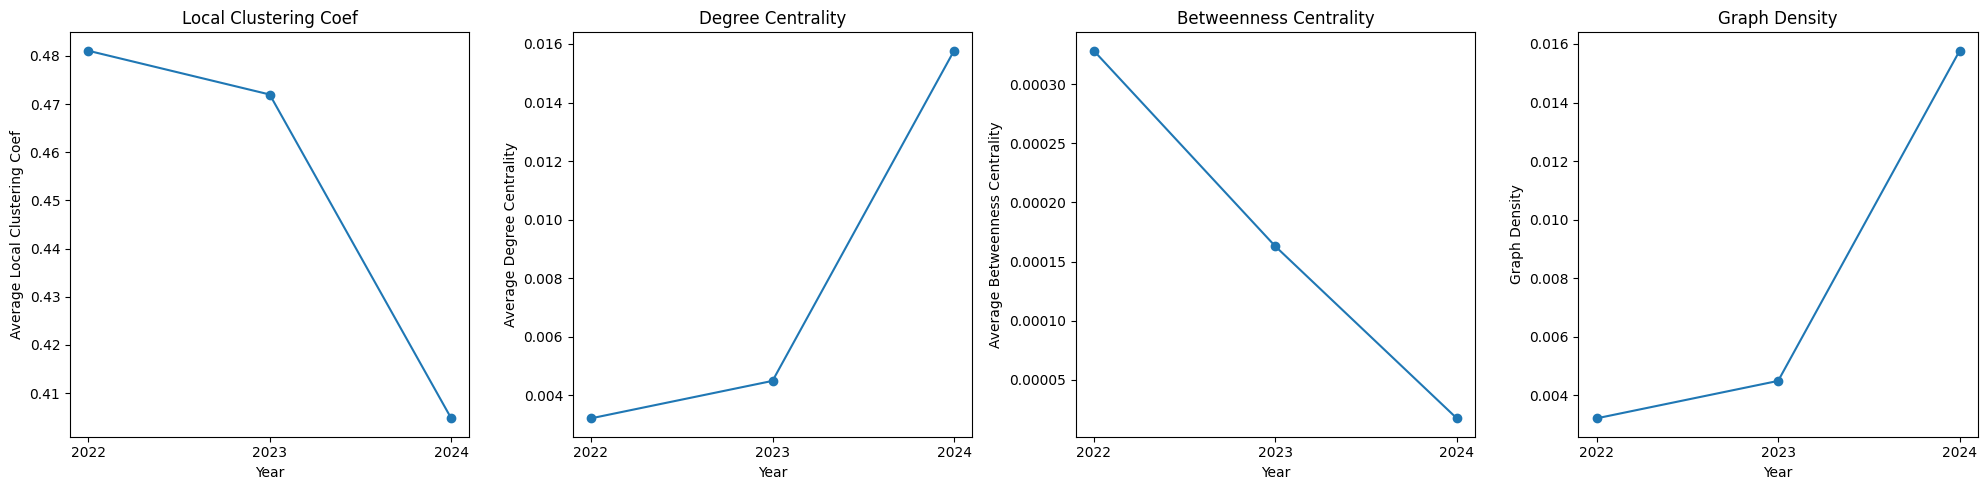

In [39]:
ga.plot_network_statistics(graph_stat_df_final)

Add the explanation of graph statistics here for workflow

In [9]:
boarded_graph_df_with_gvkey = ga.create_company_level_statistics(boardex_data, boardex_gvkey_df, graph_stat_df_final)

In [10]:
boarded_graph_df_with_gvkey.head()

,permco,gvkey,companyid,score,preferred,duplicate,boardid,boardname,year,local_clustering_coef,degree_centrality,betweenness_centrality,graph_density
0,216,1602,2068.0,1.0,1.0,0.0,2068.0,AMGEN INC,2022,0.428352,0.001668,9.543488e-04,0.003216
1,216,1602,2068.0,1.0,1.0,0.0,2068.0,AMGEN INC,2023,0.156650,0.002396,1.115499e-03,0.004495
2,682,18738,28834.0,1.0,1.0,0.0,28834.0,DOMINARI HOLDINGS INC (AIkido Pharma Inc prior...,2022,0.000000,0.000852,6.180685e-07,0.003216
3,682,18738,28834.0,1.0,1.0,0.0,28834.0,DOMINARI HOLDINGS INC (AIkido Pharma Inc prior...,2023,0.000000,0.000945,0.000000e+00,0.004495
4,887,12713,2179515.0,6.0,1.0,1.0,2179515.0,ABEONA THERAPEUTICS INC (PlasmaTech Biopharmac...,2022,0.000000,0.000591,0.000000e+00,0.003216


We have overall 615 companies, so can be useful

Above error is due to the incorrect company matches

Get this and run by every company to get the stock id

Link everything back to GVKEY to match with Compustat data

In [11]:
boarded_graph_df_with_gvkey = boarded_graph_df_with_gvkey.drop_duplicates(["gvkey", "year"])
boarded_graph_df_with_gvkey.shape

(1402, 13)

In [12]:
# boarded_graph_df_with_gvkey.to_csv("final_data/boardex_graph_stats_gvkey.csv.csv")

Next we visualise the graph data structure, and sentiments over time

(Maybe reuse some of the structures above)

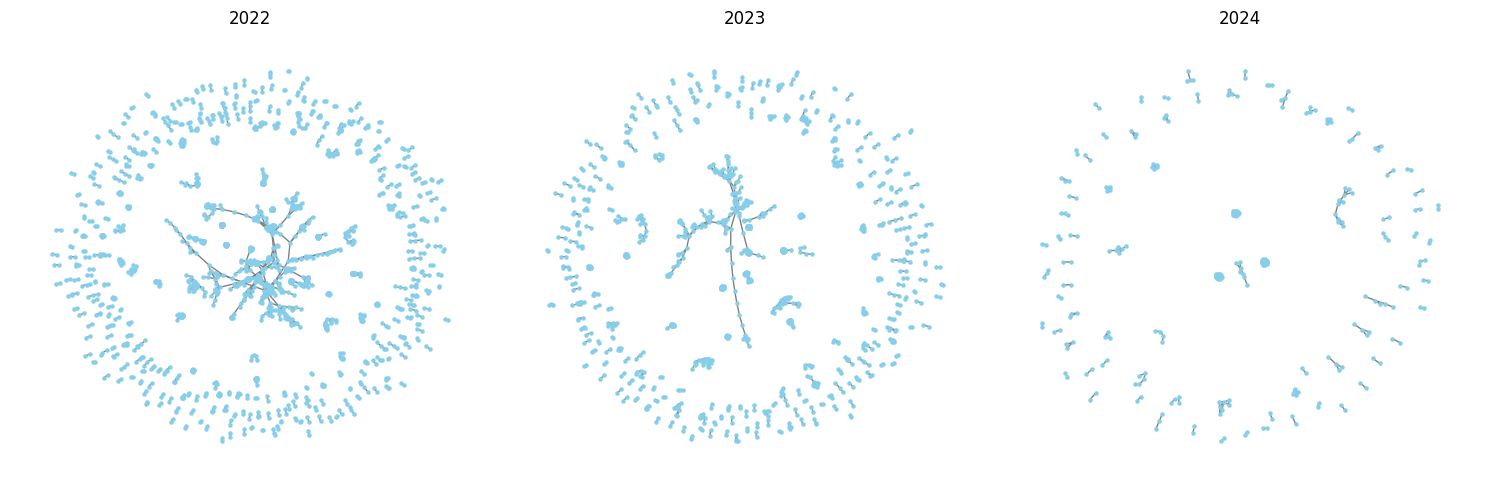

In [13]:
ga.plot_graphs_from_dict(boardex_interlock_adj_dict)

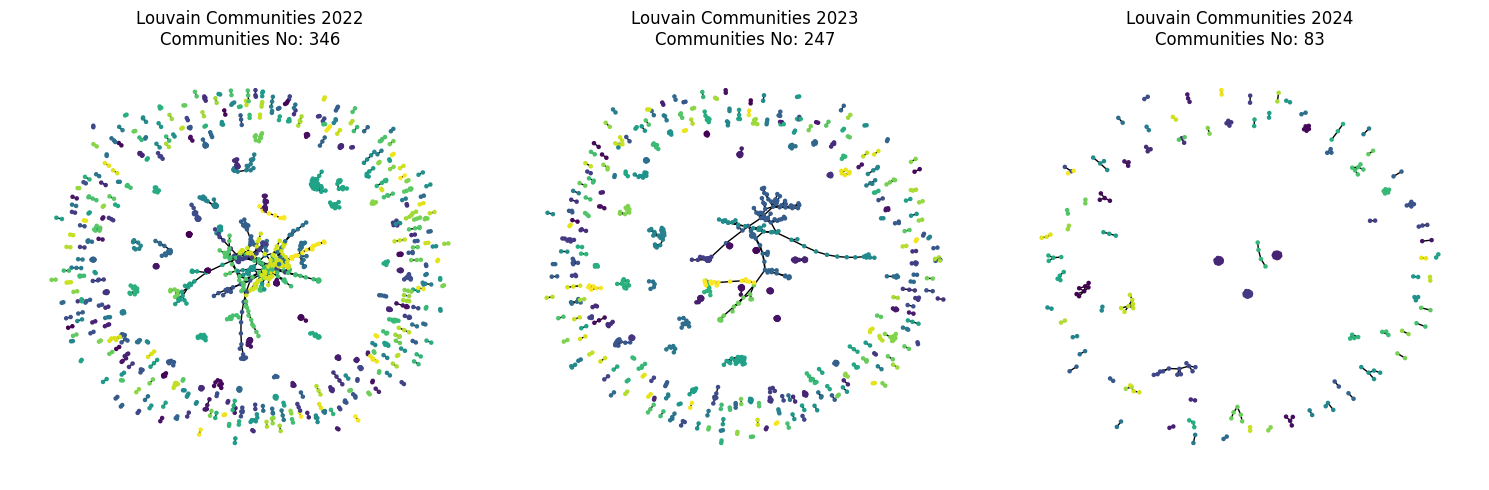

In [14]:
ga.plot_louvain_communities_from_dict(boardex_interlock_adj_dict)

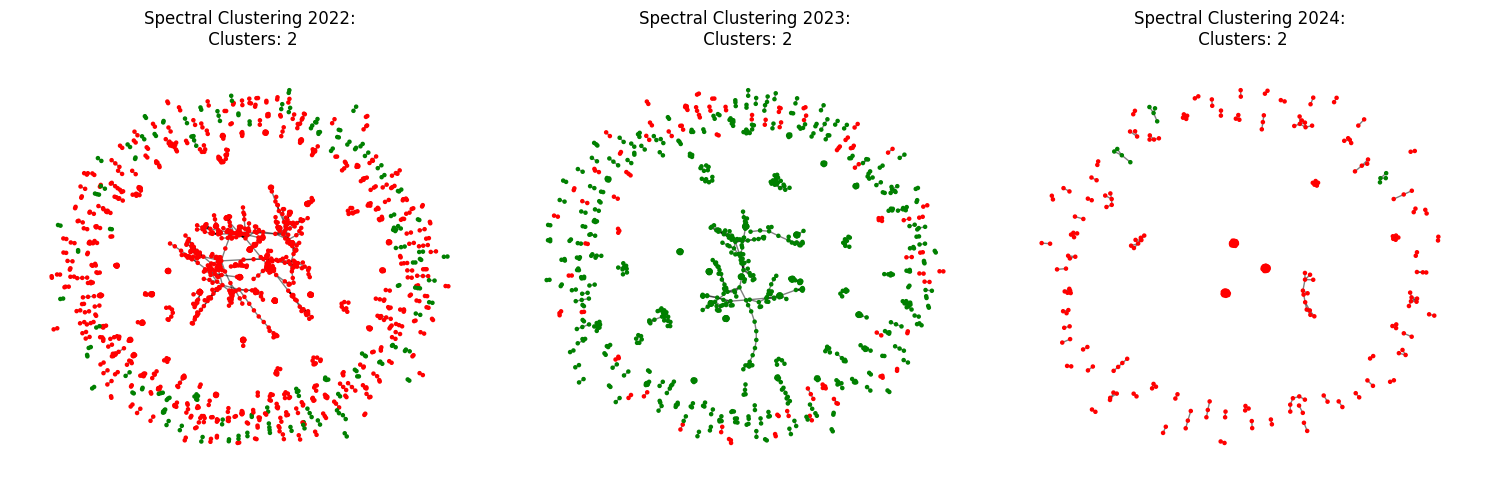

In [15]:
# visualise the graph densities in the above, for overview of content
ga.plot_spectral_clustering_from_dict(boardex_interlock_adj_dict, n_clusters=2, colour_map = ['red', 'green', 'blue', "orange", "yellow"])

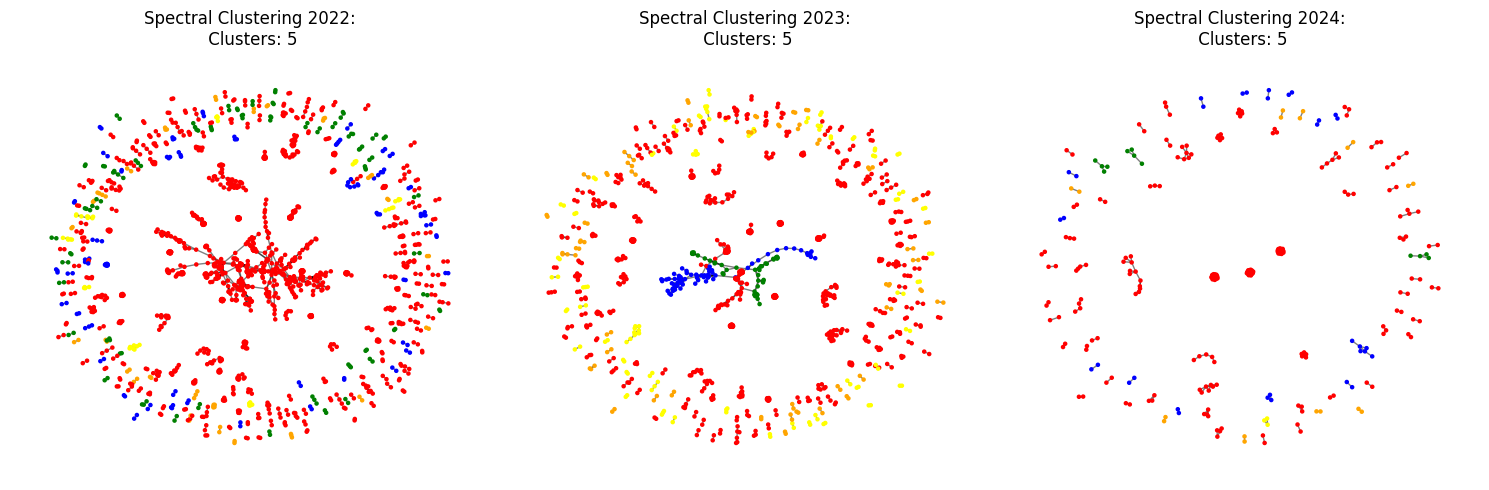

In [16]:
ga.plot_spectral_clustering_from_dict(boardex_interlock_adj_dict, n_clusters=5, colour_map = ['red', 'green', 'blue', "orange", "yellow"])

### 3. Analysis of Text - Annual Report for Decisioning

Average sentiment over time, and look at the graphs over time

#### Add topic details

Relevant topic changes over time, changes in relevant topics, most prominent topics - count these over time, and changes, over the few years, review give the topic structure

Add relevant functions for this, and do the relevant write up.

In [ ]:
# add relevant functions here and that's it!!

# fix up the LDA structure here for further analysis

### 4. Regression model of Governance structures and Decisioning on Company Performance

**Maybe filter out the most relevant variables above before passing to this section here**

Describe here the naive model.

Do some basic EDA structure (correlation effects of relevant effects)

And analyse the structure here, and statistical output for the workflow here.

Convert the Stata commands here and that's it!! Put it in the same notebook!!

### 5. Conclusion and Next steps

Use README section and discuss Bayesian workflow here. Seen here features are meaningful particular on sentiment, therefore use regression to do topic modelling here.

1. Meaningful graph cluster - from EDA structure
2. Topic modelling from the regression
3. Add more data to enrich the details, given the limited interpretation, - describe features missing and add this here.
    - Add more years as needed for the workflow

Bayesian enrichment of topics - given the structure we have.